<br><p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold; text-align : center;">
 Mini Project <br><br> </p> <p style="font-family: Arial; font-size:1.5em;color:purple; font-style:bold;" >Does the rise of Mobile subscriptions tend to impact the GDP in emerging economies like Madagascar ? </p>

<td><img src="http://zarzosa.me/wp-content/uploads/information-about-madagascar-tour-in-and-world-map.jpg" align="middle"/></td>
<br>

In this notebook, I will be using an open dataset from Kaggle. It is The **World Development Indicators** dataset obtained from the World Bank containing over a thousand annual indicators of economic development from hundreds of countries around the world. 

This is a slightly modified version of the original dataset from The World Bank.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

**Let's explore the dataset**

In [2]:
data = pd.read_csv('./Sources/world-development-indicators/Indicators.csv')
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [3]:
print(type(data))
data.shape

<class 'pandas.core.frame.DataFrame'>


(5656458, 6)

**Let's make an overview of the dataset to see if there is an interesting indicator **

In [105]:
#data

**How many indicators and country names are listed on the dataset ?**

In [5]:
data_indicators = data['IndicatorName'].unique().tolist()
data_countries = data['CountryName'].unique().tolist()

print("There are", len(data_indicators),"indicators")
print("There are", len(data_countries), "countries")

There are 1344 indicators
There are 247 countries


In [104]:
#data_countries

### Lets pick the country we want to explore : Madagascar

In [7]:
filter_madagascar = data['CountryName']=='Madagascar'
data_CountryName = data[filter_madagascar]
data_CountryName.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
14351,Madagascar,MDG,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,155.490000
14352,Madagascar,MDG,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,85.018308
14353,Madagascar,MDG,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.035425
14354,Madagascar,MDG,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,78.982883
14355,Madagascar,MDG,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,48.703000


In [8]:
filter_mdg = data['CountryCode']=='MDG'
data_country_code = data[filter_mdg]

In [9]:
print(len(data_country_code))
print(len(data_CountryName))

32637
32637


I can see that the **CountryCode** 'MDG' appears as many times as the **CountryName** 'Madagascar'

### Lets pick the indicator to explore in Madagascar : Mobile cellular subscriptions (per 100 people) 

Mobile cellular telephone subscriptions are subscriptions to a public mobile telephone service that provide access to the PSTN using cellular technology. The indicator includes (and is split into) the number of postpaid subscriptions, and the number of active prepaid accounts (i.e. that have been used during the last three months). The indicator applies to all mobile cellular subscriptions that offer voice communications. It excludes subscriptions via data cards or USB modems, subscriptions to public mobile data services, private trunked mobile radio, telepoint, radio paging and telemetry services.

*Source: International Telecommunication Union, World Telecommunication/ICT Development Report and database.*

In [22]:
# select Mobile cellular subscriptions
filter_indicator_mobile = data['IndicatorName'].str.contains('Mobile cellular subscriptions \(per 100 people')

# data_mobile_mdg is just those indicators matching Madagascar for country code and  Mobile cellular subscriptions over time.
data_mobile_mdg = data[filter_madagascar & filter_indicator_mobile]
data_mobile_mdg.head(25)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
14474,Madagascar,MDG,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,1960,0.000000
155913,Madagascar,MDG,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,1965,0.000000
336051,Madagascar,MDG,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,1970,0.000000
682417,Madagascar,MDG,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,1975,0.000000
755373,Madagascar,MDG,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,1976,0.000000
830111,Madagascar,MDG,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,1977,0.000000
905488,Madagascar,MDG,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,1978,0.000000
981351,Madagascar,MDG,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,1979,0.000000
1060554,Madagascar,MDG,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,1980,0.000000
1143739,Madagascar,MDG,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,1981,0.000000


I can see that the value is equal to zero before 1994 ! 

In [11]:
len(data_mobile_mdg)

43

In [12]:
#What is the value's range ?
print("Value is between",min(data_mobile_mdg['Value'].tolist())," to ",max(data_mobile_mdg['Value'].tolist()))

Value is between 0.0  to  40.042430130559


In [13]:
#How many years of data do we have ?
print("Year is between",min(data_mobile_mdg['Year'].tolist())," to ",max(data_mobile_mdg['Year'].tolist()))

Year is between 1960  to  2014


### Let's see how Mobile cellular subscriptions have changed over time in Madagascar

In [14]:
# get the years
years = data_mobile_mdg['Year'].values

# get the values 
mobile_sub = data_mobile_mdg['Value'].values

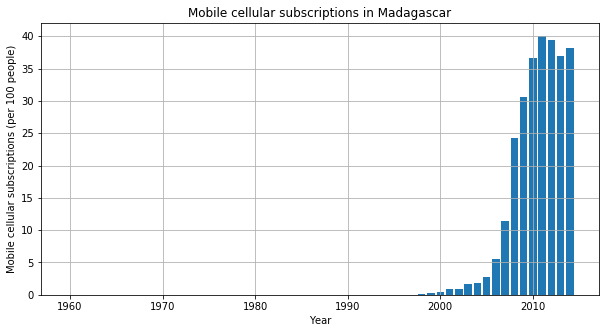

In [15]:
# Label the axes
plt.figure(figsize=(10,5))
plt.xlabel('Year')
plt.ylabel(data_mobile_mdg['IndicatorName'].iloc[0])

#label the figure
plt.title('Mobile cellular subscriptions in Madagascar')

# create
plt.bar(years,mobile_sub)
plt.grid(True)
plt.show()

I can see that Mobile cellular subscriptions increase strongly around 2004, dropped in 2013 and try to recover again !!

Let's plot it differently

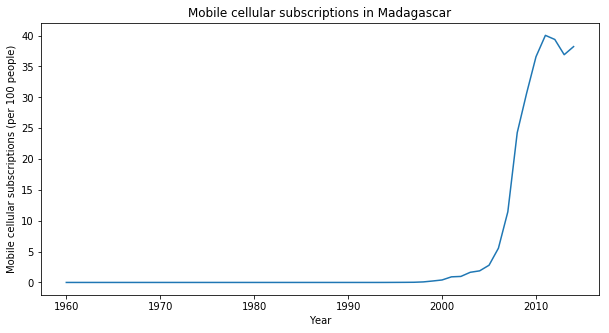

In [16]:
# Label the axes
plt.figure(figsize=(10,5))
plt.xlabel('Year')
plt.ylabel(data_mobile_mdg['IndicatorName'].iloc[0])

#label the figure
plt.title('Mobile cellular subscriptions in Madagascar')

# switch to a line plot
plt.plot(years,mobile_sub)
plt.show()

Let's use Histograms to explore the distribution of values

In [26]:
# to make it more honest, let's start the x axis at 1994
data_mobile_mdg_from1994 = data_mobile_mdg[data_mobile_mdg['Year']>1993]
data_mobile_mdg_from1994.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
2435249,Madagascar,MDG,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,1994,0.002301
2566411,Madagascar,MDG,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,1995,0.009664
2701696,Madagascar,MDG,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,1996,0.016567
2837339,Madagascar,MDG,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,1997,0.028613
2974241,Madagascar,MDG,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,1998,0.086435


In [27]:
value_mobile_sub_from1994 = data_mobile_mdg_from1994['Value'].values

C:\Users\jrambelo\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


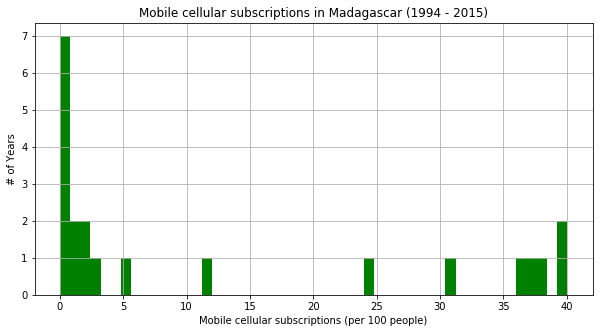

In [29]:
# Label the axes
plt.figure(figsize=(10,5))
plt.xlabel(data_mobile_mdg['IndicatorName'].iloc[0])
plt.ylabel('# of Years')

#label the figure
plt.title('Mobile cellular subscriptions in Madagascar (1994 - 2015)')

plt.hist(value_mobile_sub_from1994, 50, normed=False, facecolor='green')
plt.grid(True)
plt.show()

I can see that Madagascar took so many years to pass the milestone of 5 cellular subscriptions per 100 persons.

### But how do Madagascar's cellular subscriptions relate to those of other countries?

Let's pick the year 2014 and see how the other countries perform

**Note : ** Madagascar made ~ 38.2 cellular subscriptions per 100 persons in 2014

In [30]:
year_2014 = data['Year'].isin([2014])
mobile_sub_2014_global = data[year_2014 & filter_indicator_mobile]
mobile_sub_2014_global.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5534480,Arab World,ARB,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,2014,109.152264
5534724,Caribbean small states,CSS,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,2014,109.925139
5535039,Central Europe and the Baltics,CEB,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,2014,132.719245
5535331,East Asia & Pacific (all income levels),EAS,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,2014,103.170723
5535691,East Asia & Pacific (developing only),EAP,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,2014,100.476563


In [31]:
len(mobile_sub_2014_global)

236

C:\Users\jrambelo\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


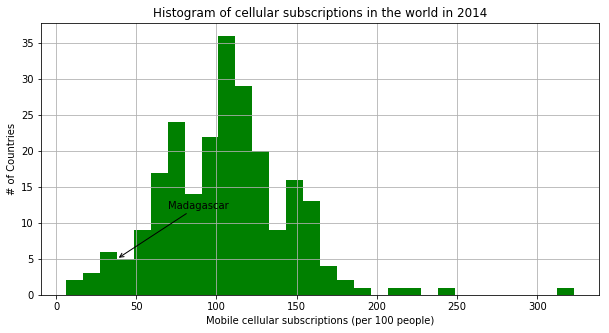

In [32]:
fig, ax = plt.subplots(figsize=(10,5))

ax.annotate("Madagascar",
            xy=(38, 5), xycoords='data',
            xytext=(70, 12), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.xlabel(mobile_sub_2014_global['IndicatorName'].iloc[0])
plt.ylabel('# of Countries')
plt.title('Histogram of cellular subscriptions in the world in 2014')


plt.hist(mobile_sub_2014_global['Value'], 30, normed=False, facecolor='green')
plt.grid(True)
plt.show()

~38.2 of mobile cellular subscriptions is quite low among all countries !!
Let's compare it to all developping countries 

### How this relates to other developping countries ?### 

First, let's select all the rows that matches our criteria :
* CountryName : All the developing areas
* IndicatorName : Mobile cellular subscriptions

In [35]:
#filter_indicator_mobile = data['IndicatorName'].str.contains('Mobile cellular subscriptions \(per 100 people')
filter_indicator_developing = data['CountryName'].str.contains('developing only')

data_mobile_developing = data [filter_indicator_developing & filter_indicator_mobile]
data_mobile_developing.head(15)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
429,East Asia & Pacific (developing only),EAP,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,1960,0.0
751,Europe & Central Asia (developing only),ECA,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,1960,0.0
1624,Latin America & Caribbean (developing only),LAC,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,1960,0.0
2231,Middle East & North Africa (developing only),MNA,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,1960,0.0
3192,Sub-Saharan Africa (developing only),SSA,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,1960,0.0
136554,East Asia & Pacific (developing only),EAP,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,1965,0.0
136957,Europe & Central Asia (developing only),ECA,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,1965,0.0
138135,Latin America & Caribbean (developing only),LAC,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,1965,0.0
138935,Middle East & North Africa (developing only),MNA,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,1965,0.0
140207,Sub-Saharan Africa (developing only),SSA,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,1965,0.0


Now, let's take all the CountryCode that matches the developing areas

In [36]:
data_mobile_developing['CountryCode'].unique().tolist()

['EAP', 'ECA', 'LAC', 'MNA', 'SSA']

Let's pick and filter these 5 developping areas CountryCode

In [37]:
#filter_indicator_mobile = data['IndicatorName'].str.contains('Mobile cellular subscriptions \(per 100 people')

filter_indicator_EAP = data['CountryCode'].str.contains('EAP')
filter_indicator_ECA = data['CountryCode'].str.contains('ECA')
filter_indicator_LAC = data['CountryCode'].str.contains('LAC')
filter_indicator_MNA = data['CountryCode'].str.contains('MNA')
filter_indicator_SSA = data['CountryCode'].str.contains('SSA')

data_mobile_EAP = data [filter_indicator_EAP & filter_indicator_mobile]
data_mobile_ECA = data [filter_indicator_ECA & filter_indicator_mobile]
data_mobile_LAC = data [filter_indicator_LAC & filter_indicator_mobile]
data_mobile_MNA = data [filter_indicator_MNA & filter_indicator_mobile]
data_mobile_SSA = data [filter_indicator_SSA & filter_indicator_mobile]

Are the length equal ?

In [38]:
print(len(data_mobile_EAP))
print(len(data_mobile_ECA))
print(len(data_mobile_LAC))
print(len(data_mobile_MNA))
print(len(data_mobile_SSA))
print(len(data_mobile_mdg))

43
43
43
43
43
43


The lengths are the same. Let's look at one dataset to see what it looks like :

In [39]:
data_mobile_EAP.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
429,East Asia & Pacific (developing only),EAP,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,1960,0.0
136554,East Asia & Pacific (developing only),EAP,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,1965,0.0
298598,East Asia & Pacific (developing only),EAP,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,1970,0.0
638974,East Asia & Pacific (developing only),EAP,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,1975,0.0
711540,East Asia & Pacific (developing only),EAP,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,1976,0.0


In [40]:
# get the values
value_mobile_MDG = data_mobile_mdg['Value'].values
value_mobile_EAP = data_mobile_EAP['Value'].values
value_mobile_ECA = data_mobile_ECA['Value'].values
value_mobile_LAC = data_mobile_LAC['Value'].values
value_mobile_MNA = data_mobile_MNA['Value'].values
value_mobile_SSA = data_mobile_SSA['Value'].values

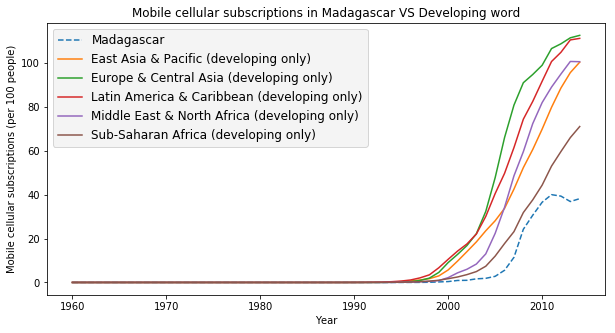

In [41]:
plt.figure(figsize=(10,5))

plt.plot(years,value_mobile_MDG,'--')
plt.plot(years,value_mobile_EAP)
plt.plot(years,value_mobile_ECA)
plt.plot(years,value_mobile_LAC)
plt.plot(years,value_mobile_MNA)
plt.plot(years,value_mobile_SSA)

# Label the axes
plt.xlabel('Year')
plt.ylabel(data_mobile_mdg['IndicatorName'].iloc[0])

#label the figure
plt.title('Mobile cellular subscriptions in Madagascar VS Developing word')

#plt.axis([1990, 2015,0,350])
legend = plt.legend(["Madagascar","East Asia & Pacific (developing only)",
            "Europe & Central Asia (developing only)","Latin America & Caribbean (developing only)",
            "Middle East & North Africa (developing only)","Sub-Saharan Africa (developing only)"],
           prop={'weight':'roman','size':'large'})
frame = legend.get_frame()
frame.set_facecolor('.95')
plt.show()

**Conclusion :**

* Madagascar is **far below** the rest of the developing world.
* The Sub-Saharan Africa (which is the area where Madagascar belongs) is the **closest to it's curve.**
* The beginning of the **mobile revolution has been delayed in Madagascar** and start almost 7 years after the other developing countries.This is even more obvious when compared to high income OECD (see below)!

### How this relates to the developped countries ?### 

I pick 2 areas and 2 countries :
* High income: OECD
* High income: Non OECD
* United Kingdom
* France

In [42]:
filter_indicator_HI_OECD = data['CountryName'].str.contains('High income: OECD')
filter_indicator_HI_NOECD = data['CountryName'].str.contains('High income: nonOECD')
filter_indicator_UK = data['CountryName'].str.contains('United Kingdom')
filter_indicator_FRA = data['CountryCode'].str.contains('FRA')

data_mobile_HI_OECD = data[filter_indicator_HI_OECD & filter_indicator_mobile]
data_mobile_HI_NOECD = data[filter_indicator_HI_NOECD & filter_indicator_mobile]
data_mobile_UK = data[filter_indicator_UK & filter_indicator_mobile]
data_mobile_FRA = data [filter_indicator_FRA & filter_indicator_mobile]

In [43]:
print(len(data_mobile_HI_OECD))
print(len(data_mobile_HI_NOECD))
print(len(data_mobile_UK))
print(len(data_mobile_FRA))

43
43
43
43


In [44]:
value_mobile_HI_OECD = data_mobile_HI_OECD['Value'].values
value_mobile_HI_NOECD = data_mobile_HI_NOECD['Value'].values
value_mobile_HI_UK = data_mobile_UK['Value'].values
value_mobile_HI_FRA = data_mobile_FRA['Value'].values

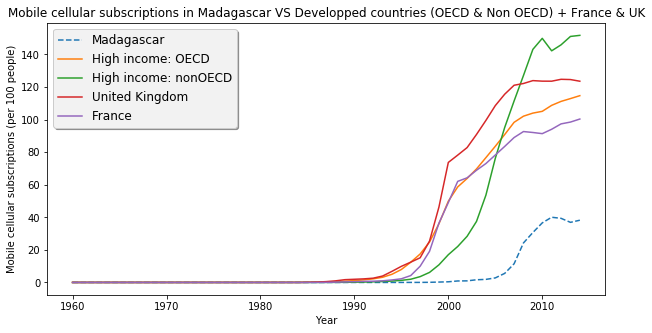

In [45]:
plt.figure(figsize=(10,5))

plt.plot(years,value_mobile_MDG,'--')
plt.plot(years,value_mobile_HI_OECD)
plt.plot(years,value_mobile_HI_NOECD)
plt.plot(years,value_mobile_HI_UK)
plt.plot(years,value_mobile_HI_FRA)


# Label the axes
plt.xlabel('Year')
plt.ylabel(data_mobile_mdg['IndicatorName'].iloc[0])

#label the figure
plt.title('Mobile cellular subscriptions in Madagascar VS Developped countries (OECD & Non OECD) + France & UK')

#plt.axis([1990, 2016,0,350])
legend = plt.legend(["Madagascar","High income: OECD","High income: nonOECD","United Kingdom","France"],  
                    shadow=True, prop={'weight':'roman','size':'large'})

frame = legend.get_frame()
frame.set_facecolor('.95')
plt.show()

While the beginning of the cellular subscription began around 2000 in Madagascar, it began earlier around 1990 in High income countries.

## Relationship between GDP and  cellular subscriptions in Madagascar##

### 1) First, let's look at the GDP per capita in Madagascar ###

In [46]:
# Create a filter to select GDP per capita in Madagascar
filter_GDP = data['IndicatorName'].str.contains('GDP per capita \(constant 2005')
#filter_madagascar = data['CountryName']=='Madagascar'
data_GDP_mdg = data[filter_madagascar & filter_GDP]

In [47]:
print(len(data_GDP_mdg))
data_GDP_mdg.head()

55


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
14394,Madagascar,MDG,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,475.498701
39704,Madagascar,MDG,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,473.697918
67411,Madagascar,MDG,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1962,472.775693
95974,Madagascar,MDG,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1963,456.949256
124822,Madagascar,MDG,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1964,463.333847


In [48]:
value_years = data_GDP_mdg['Year'].values
value_GDP= data_GDP_mdg['Value'].values

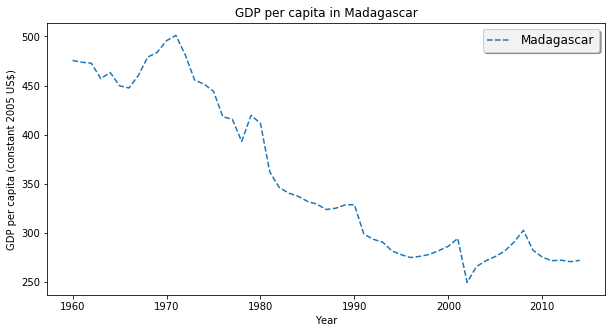

In [101]:
plt.figure(figsize=(10,5))
plt.plot(value_years,value_GDP,'--')

# Label the axes
plt.xlabel('Year')
plt.ylabel(data_GDP_mdg['IndicatorName'].iloc[0])

plt.title('GDP per capita in Madagascar')
legend = plt.legend(["Madagascar"],  
                    shadow=True, prop={'weight':'roman','size':'large'})
frame = legend.get_frame()
frame.set_facecolor('.95')
plt.show()

We can see that Madagascar's GDP decreases all the time. It tries to recover almost every ten years (1970, 1980, 1990, 2009) and then tend to decrease again !

### 2) Second, let's compare GDP (per capita) against cellular subscriptions in Madagascar by using scatter plots & statistical correlation ###

In [50]:
print("GDP Years are from :",min(data_GDP_mdg['Year'].tolist())," to ",max(data_GDP_mdg['Year'].tolist()))
print("Mobile subscriptions Years are from",min(data_mobile_mdg['Year'].tolist())," to ",max(data_mobile_mdg['Year'].tolist()))

GDP Years are from : 1960  to  2014
Mobile subscriptions Years are from 1960  to  2014


In [51]:
print(len(data_mobile_mdg['Value']))
print(len(data_GDP_mdg['Value']))

43
55


The length of data_mobile_mdg and data_GDP_mdg are different. 

In [52]:
data_mobile_mdg.head(25)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
14474,Madagascar,MDG,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,1960,0.000000
155913,Madagascar,MDG,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,1965,0.000000
336051,Madagascar,MDG,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,1970,0.000000
682417,Madagascar,MDG,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,1975,0.000000
755373,Madagascar,MDG,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,1976,0.000000
830111,Madagascar,MDG,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,1977,0.000000
905488,Madagascar,MDG,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,1978,0.000000
981351,Madagascar,MDG,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,1979,0.000000
1060554,Madagascar,MDG,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,1980,0.000000
1143739,Madagascar,MDG,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,1981,0.000000


I can see that : 
* The data_mobile_mdg has missing datas between 1960 and 1965
* Starting from 1994, Mobile cellular subscriptions value becomes nonzero

In [53]:
data_GDP_mdg.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
14394,Madagascar,MDG,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,475.498701
39704,Madagascar,MDG,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,473.697918
67411,Madagascar,MDG,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1962,472.775693
95974,Madagascar,MDG,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1963,456.949256
124822,Madagascar,MDG,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1964,463.333847


Let's filter the data starting from 1994

In [54]:
data_mobile_mdg_from1994 = data_mobile_mdg[data_mobile_mdg['Year']>1993]
data_GDP_mdg_from1994 = data_GDP_mdg[data_GDP_mdg['Year']>1993]

In [55]:
print(len(data_mobile_mdg_from1994))
print(len(data_GDP_mdg_from1994))

21
21


Lengths are now the equals, let's plot it.

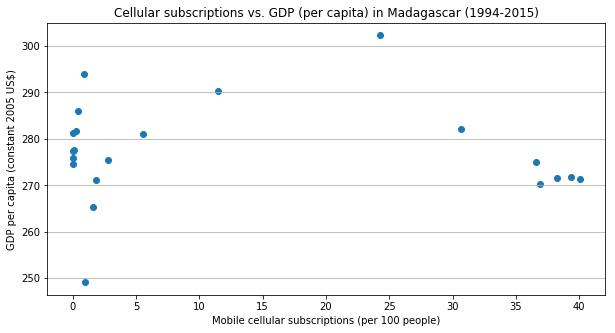

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize=(10,5))

axis.yaxis.grid(True)
axis.set_title('Cellular subscriptions vs. GDP (per capita) in Madagascar (1994-2015)')
axis.set_xlabel(data_mobile_mdg_from1994['IndicatorName'].iloc[0])
axis.set_ylabel(data_GDP_mdg_from1994['IndicatorName'].iloc[0])

axis.scatter(data_mobile_mdg_from1994['Value'], data_GDP_mdg_from1994['Value'])
plt.show()

It doesn't look like there is a strong relationship between the GDP and the cellular subscriptions in Madagascar. Let's confirm this by looking at the correlation.

In [57]:
np.corrcoef(data_GDP_mdg_from1994['Value'],data_mobile_mdg_from1994['Value'])

array([[ 1.        , -0.04562643],
       [-0.04562643,  1.        ]])

Conclusion :
* A correlation of -0.045 is preatty weak 
* I can conclude that there is no correlation between the GDP and the cellular subscriptions in Madagascar (1994-2015).


### 3) Let's see if there is a correlation between GDP per capita and the Mobile subscriptions in the developping countries (same method :  scatter plots & statistical correlation) ###

In [58]:
# select GDP per capita in all developing countries
data_GDP_EAP = data[filter_indicator_EAP & filter_GDP]
data_GDP_ECA = data[filter_indicator_ECA & filter_GDP]
data_GDP_LAC = data[filter_indicator_LAC & filter_GDP]
data_GDP_MNA = data[filter_indicator_MNA & filter_GDP]
data_GDP_SSA = data[filter_indicator_SSA & filter_GDP]

In [59]:
print(len(data_GDP_EAP))
print(len(data_GDP_ECA))
print(len(data_GDP_LAC))
print(len(data_GDP_MNA))
print(len(data_GDP_SSA))

55
28
55
50
55


Same problem as before, the lenghts are different. Let's make filters starting from 1993

In [60]:
data_GDP_EAP_from1994 = data_GDP_EAP[data_GDP_EAP['Year']>1993]
data_GDP_ECA_from1994 = data_GDP_ECA[data_GDP_ECA['Year']>1993]
data_GDP_LAC_from1994 = data_GDP_LAC[data_GDP_LAC['Year']>1993]
data_GDP_MNA_from1994 = data_GDP_MNA[data_GDP_MNA['Year']>1993]
data_GDP_SSA_from1994 = data_GDP_SSA[data_GDP_SSA['Year']>1993]

data_mobile_EAP_from1994 = data_mobile_EAP[data_mobile_EAP['Year']>1993]
data_mobile_ECA_from1994 = data_mobile_ECA[data_mobile_ECA['Year']>1993]
data_mobile_LAC_from1994 = data_mobile_LAC[data_mobile_LAC['Year']>1993]
data_mobile_MNA_from1994 = data_mobile_MNA[data_mobile_MNA['Year']>1993]
data_mobile_SSA_from1994 = data_mobile_SSA[data_mobile_SSA['Year']>1993]

In [61]:
print(len(data_GDP_EAP_from1994))
print(len(data_GDP_ECA_from1994))
print(len(data_GDP_LAC_from1994))
print(len(data_GDP_MNA_from1994))
print(len(data_GDP_SSA_from1994))

print(len(data_mobile_EAP_from1994))
print(len(data_mobile_ECA_from1994))
print(len(data_mobile_LAC_from1994))
print(len(data_mobile_MNA_from1994))
print(len(data_mobile_SSA_from1994))

21
21
21
21
21
21
21
21
21
21


Lengths are equals now. Let's plot this !

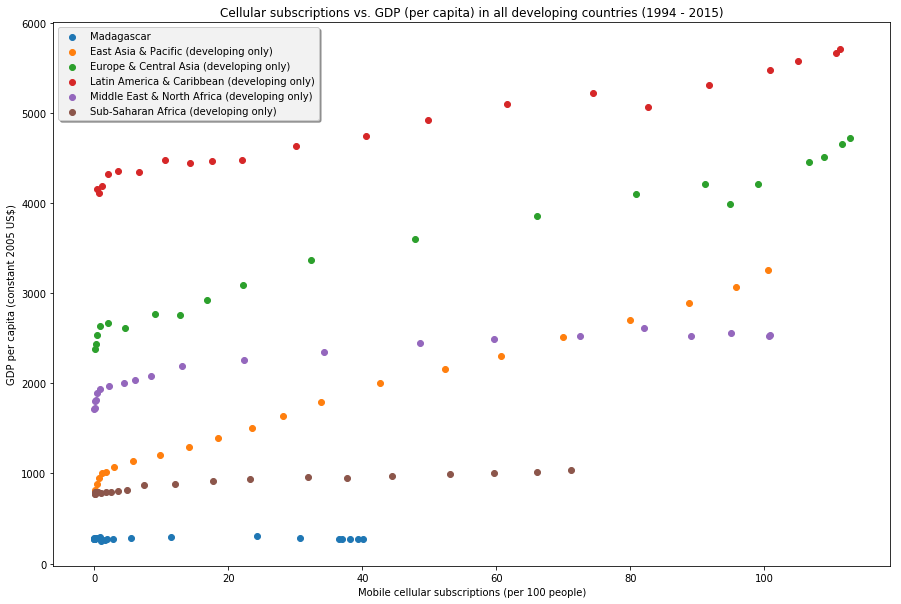

In [97]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize=(15,10))

axis.set_title('Cellular subscriptions vs. GDP (per capita) in all developing countries (1994 - 2015)')
axis.set_xlabel(data_mobile_mdg_from1994['IndicatorName'].iloc[0])
axis.set_ylabel(data_GDP_mdg_from1994['IndicatorName'].iloc[0])

axis.scatter(data_mobile_mdg_from1994['Value'], data_GDP_mdg_from1994['Value'])
axis.scatter(data_mobile_EAP_from1994['Value'], data_GDP_EAP_from1994['Value'])
axis.scatter(data_mobile_ECA_from1994['Value'], data_GDP_ECA_from1994['Value'])
axis.scatter(data_mobile_LAC_from1994['Value'], data_GDP_LAC_from1994['Value'])
axis.scatter(data_mobile_MNA_from1994['Value'], data_GDP_MNA_from1994['Value'])
axis.scatter(data_mobile_SSA_from1994['Value'], data_GDP_SSA_from1994['Value'])

legend = plt.legend(["Madagascar","East Asia & Pacific (developing only)",
            "Europe & Central Asia (developing only)","Latin America & Caribbean (developing only)",
            "Middle East & North Africa (developing only)","Sub-Saharan Africa (developing only)"],
            shadow=True,
            prop={'weight':'roman','size':'medium'})

frame = legend.get_frame()
frame.set_facecolor('.95')
plt.show()

This is surprising. It looks like there is a strong correlation between GDP per capita and Mobile Cellular subscriptions in all developing country (even in Sub Saharan area). Let's confirm this by looking at the correlation.

In [132]:
print(np.corrcoef(data_mobile_mdg_from1994['Value'],data_GDP_mdg_from1994['Value']),
      "\n --> Madagascar: No correlation \n")
print(np.corrcoef(data_mobile_EAP_from1994['Value'],data_GDP_EAP_from1994['Value']),
      "\n --> East Asia & Pacific: correlation \n")
print(np.corrcoef(data_mobile_ECA_from1994['Value'],data_GDP_ECA_from1994['Value']),
      "\n --> Europe & Central Asia: correlation\n")
print(np.corrcoef(data_mobile_LAC_from1994['Value'],data_GDP_LAC_from1994['Value']),
      "\n --> Latin America & Caribbean: correlation\n")
print(np.corrcoef(data_mobile_MNA_from1994['Value'],data_GDP_MNA_from1994['Value']),
      "\n --> Middle East & North Africa: correlation\n")
print(np.corrcoef(data_mobile_SSA_from1994['Value'],data_GDP_SSA_from1994['Value']),
      "\n --> Sub-Saharan Africa: correlation\n")

[[ 1.         -0.04562643]
 [-0.04562643  1.        ]] 
 --> Madagascar: No correlation 

[[1.         0.99746121]
 [0.99746121 1.        ]] 
 --> East Asia & Pacific: correlation 

[[1.         0.98898902]
 [0.98898902 1.        ]] 
 --> Europe & Central Asia: correlation

[[1.         0.98876407]
 [0.98876407 1.        ]] 
 --> Latin America & Caribbean: correlation

[[1.         0.91496115]
 [0.91496115 1.        ]] 
 --> Middle East & North Africa: correlation

[[1.         0.95471165]
 [0.95471165 1.        ]] 
 --> Sub-Saharan Africa: correlation



**How surprising is that ! **

* Unlike Madagascar, there is a strong correlation between the mobile subscriptions and the GDP per capita in the developing world.
* Even in the Sub-saharan Africa (the area where Madagascar belongs), there is a correlation of **0.954**, this is quite strong !!
* Madagascar is an outlier among the developing world
* Madagascar is an outlier among the sub-saharan zone

### 4) And how about the correlation between GDP per capita and the Mobile subscriptions in the developped countries? (Same method :  scatter plots & statistical correlation) ###

Again, let's pick 2 areas and 2 countries :

* High income: OECD
* High income: Non OECD
* United Kingdom
* France

In [98]:
# select GDP per capita in high income countries (OECD & Non OECD)
data_GDP_HI_OECD = data[filter_indicator_HI_OECD & filter_GDP]
data_GDP_HI_NOECD = data[filter_indicator_HI_NOECD & filter_GDP]
# select GDP per capita in UK & France
data_GDP_UK = data[filter_indicator_UK & filter_GDP]
data_GDP_FRA = data[filter_indicator_FRA & filter_GDP]

# Filter the years starting from 1994 
data_GDP_HI_OECD_from1994  = data_GDP_HI_OECD[data_GDP_HI_OECD['Year']>1993]
data_GDP_HI_NOECD_from1994 = data_GDP_HI_NOECD[data_GDP_HI_NOECD['Year']>1993]
data_GDP_UK_from1994  = data_GDP_UK[data_GDP_UK['Year']>1993]
data_GDP_FRA_from1994 = data_GDP_FRA[data_GDP_FRA['Year']>1993]

data_mobile_HI_OECD_from1994 = data_mobile_HI_OECD[data_mobile_HI_OECD['Year']>1993]
data_mobile_HI_NOECD_from1994 = data_mobile_HI_NOECD[data_mobile_HI_NOECD['Year']>1993]
data_mobile_UK_from1994 = data_mobile_UK[data_mobile_UK['Year']>1993]
data_mobile_FRA_from1994 = data_mobile_FRA[data_mobile_FRA['Year']>1993]

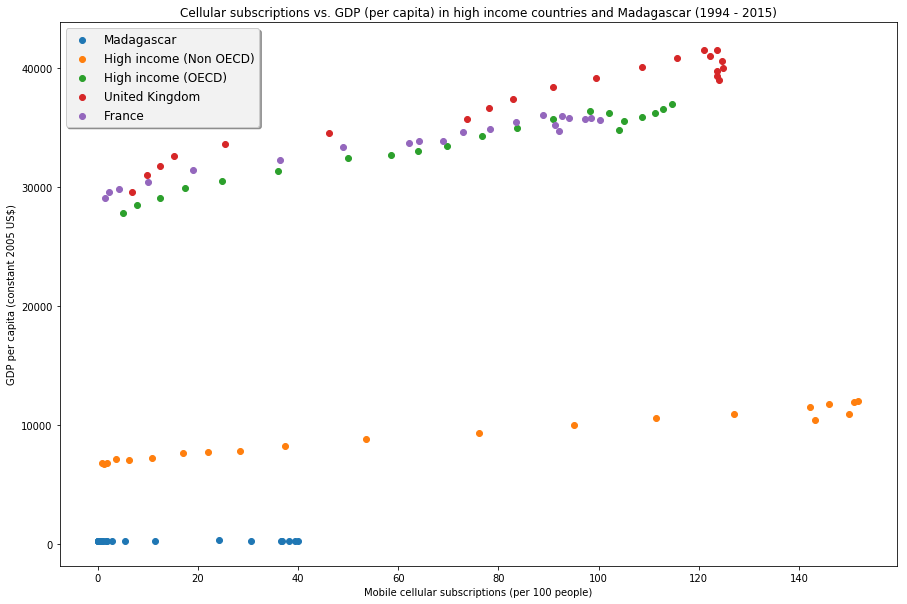

In [100]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize=(15,10))

axis.set_title('Cellular subscriptions vs. GDP (per capita) in high income countries and Madagascar (1994 - 2015)')
axis.set_xlabel(data_mobile_mdg_from1994['IndicatorName'].iloc[0])
axis.set_ylabel(data_GDP_mdg_from1994['IndicatorName'].iloc[0])

axis.scatter(data_mobile_mdg_from1994['Value'], data_GDP_mdg_from1994['Value'])
axis.scatter(data_mobile_HI_NOECD_from1994['Value'], data_GDP_HI_NOECD_from1994['Value'])
axis.scatter(data_mobile_HI_OECD_from1994['Value'], data_GDP_HI_OECD_from1994['Value'])
axis.scatter(data_mobile_UK_from1994['Value'], data_GDP_UK_from1994['Value'])
axis.scatter(data_mobile_FRA_from1994['Value'], data_GDP_FRA_from1994['Value'])

legend = plt.legend(["Madagascar","High income (Non OECD)","High income (OECD)","United Kingdom","France"],
           shadow=True,
           prop={'weight':'roman','size':'large'})
frame = legend.get_frame()
frame.set_facecolor('.95')

plt.show()

Again, It looks like there is a strong correlation between GDP per capita and Mobile Cellular subscriptions in high income countries (OECD & Non OECD). Same in France & UK. Let's confirm this by looking at the correlation.

In [182]:
print(np.corrcoef(data_mobile_HI_OECD_from1994['Value'],data_GDP_HI_OECD_from1994['Value']),
      "\n --> High income (OECD): correlation\n")
print(np.corrcoef(data_mobile_HI_NOECD_from1994['Value'],data_GDP_HI_NOECD_from1994['Value']),
      "\n --> High income (Non OECD): correlation\n")
print(np.corrcoef(data_mobile_UK_from1994['Value'],data_GDP_UK_from1994['Value']),
      "\n --> United Kingdom: correlation\n")
print(np.corrcoef(data_mobile_FRA_from1994['Value'],data_GDP_FRA_from1994['Value']),
      "\n --> France: correlation\n")

[[1.         0.98425226]
 [0.98425226 1.        ]] 
 --> High income (OECD): correlation

[[1.         0.98736057]
 [0.98736057 1.        ]] 
 --> High income (Non OECD): correlation

[[1.         0.97361538]
 [0.97361538 1.        ]] 
 --> United Kingdom: correlation

[[1.         0.98444385]
 [0.98444385 1.        ]] 
 --> France: correlation



There is a quite strong correlation between the mobile subscriptions and the GDP in high income countries (From OECD and non OECD) including United Kingdom  and France !

<h1> Conclusion : </h1>

* There is a correlation between the mobile subscriptions and the GDP in all developing countries. 
* There is a correlation between the mobile subscriptions and the GDP in high income countries (From OECD and non OECD) + France & UK.
* There is no correlation between the mobile subscriptions and the GDP in Madagascar.
* Madagascar is an outlier in the developing world (even among the subsaharian zone) where it belongs !!

Source : https://data.worldbank.org/indicator 